# Attrition example

In [1]:
# Add PyTwoWay to system path (do not run this)
# import sys
# sys.path.append('../../..')

## Import the PyTwoWay package

Make sure to install it using `pip install pytwoway`.

In [2]:
import pytwoway as tw
import bipartitepandas as bpd

## First, check out parameter options

Do this by running:

- FE - `tw.fe_params().describe_all()`

- CRE - `tw.cre_params().describe_all()`

- Clustering - `bpd.cluster_params().describe_all()`

- Cleaning - `bpd.clean_params().describe_all()`

- Simulating - `bpd.sim_params().describe_all()`

Alternatively, run `x_params().keys()` to view all the keys for a parameter dictionary, then `x_params().describe(key)` to get a description for a single key.

## Second, set parameter choices

Note that we set `copy=False` in `clean_params` to avoid unnecessary copies (although this will modify the original dataframe).

In [3]:
# FE
fe_params = tw.fe_params(
    {
        'ndraw_trace_ho': 10,
        'ndraw_trace_he': 20
    }
)
# Cleaning
clean_params = bpd.clean_params(
    {
        'connectedness': None,
        'drop_returns': 'returners',
        'copy': False
    }
)
# Simulating
sim_params = bpd.sim_params(
    {
        'n_workers': 8000,
        'firm_size': 20,
        'alpha_sig': 2, 'w_sig': 2,
        'c_sort': 1.5, 'c_netw': 1.5,
        'p_move': 0.2
    }
)

## Third, extract data (we simulate for the example)

`BipartitePandas` contains the class `SimBipartite` which we use here to simulate a bipartite network. If you have your own data, you can import it during this step. Load it as a `Pandas DataFrame` and then convert it into a `BipartitePandas DataFrame` in the next step.

In [4]:
sim_data = bpd.SimBipartite(sim_params).simulate()[['i', 'j', 'y', 't']]

## Fourth, prepare data

This is exactly how you should prepare real data prior to running the FE estimator.

- First, we convert the data into a `BipartitePandas DataFrame`

- Second, we clean the data (e.g. drop NaN observations, make sure firm and worker ids are contiguous, etc.)

- Third, we collapse the data at the worker-firm spell level (taking mean wage over the spell)

Further details on `BipartitePandas` can be found in the package documentation, available [here](https://tlamadon.github.io/bipartitepandas/).

<div class="alert alert-info">

Note

For Attrition, it is recommended to initially clean the data WITHOUT taking the connected or leave-one-out set, as these will be computed during estimation, and computing either beforehand may alter estimation results.

</div>

In [5]:
# Convert into BipartitePandas DataFrame
bdf = bpd.BipartiteDataFrame(sim_data)
# Clean and collapse
bdf = bdf.clean(clean_params).collapse(
    level='spell',
    is_sorted=True,
    copy=False
)

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index


## Fifth, initialize and run the estimator

In [ ]:
# Initialize Attrition estimator
tw_attrition = tw.Attrition(fe_params=fe_params, estimate_bs=True)
# Fit Attrition estimator
tw_attrition.attrition(bdf, N=50, ncore=8)

## Finally, generate attrition plots and boxplots

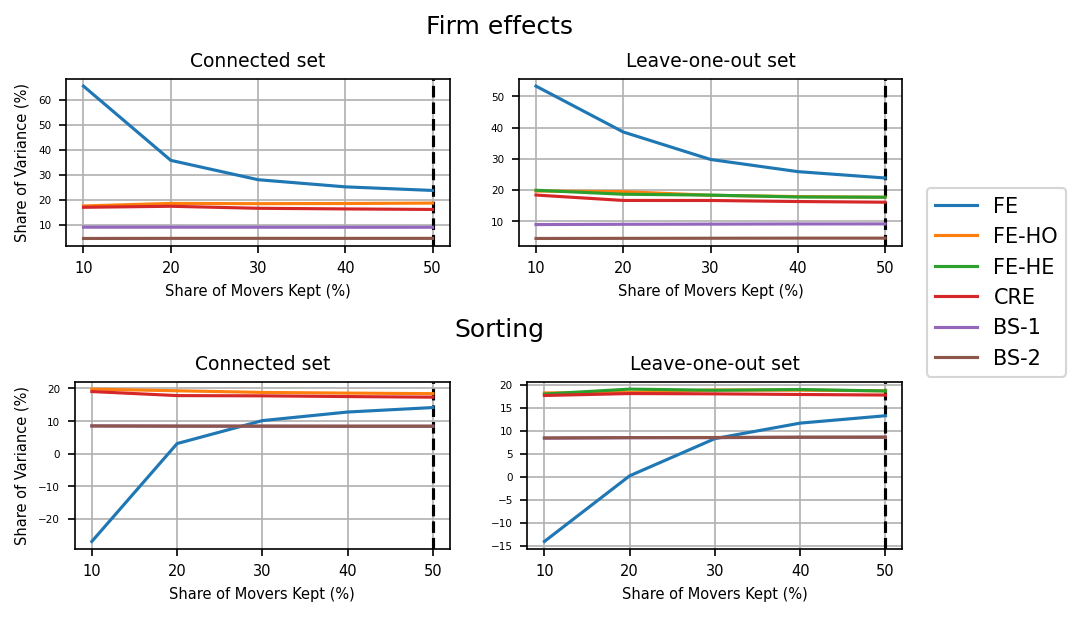

In [7]:
# Plots
tw_attrition.plots()

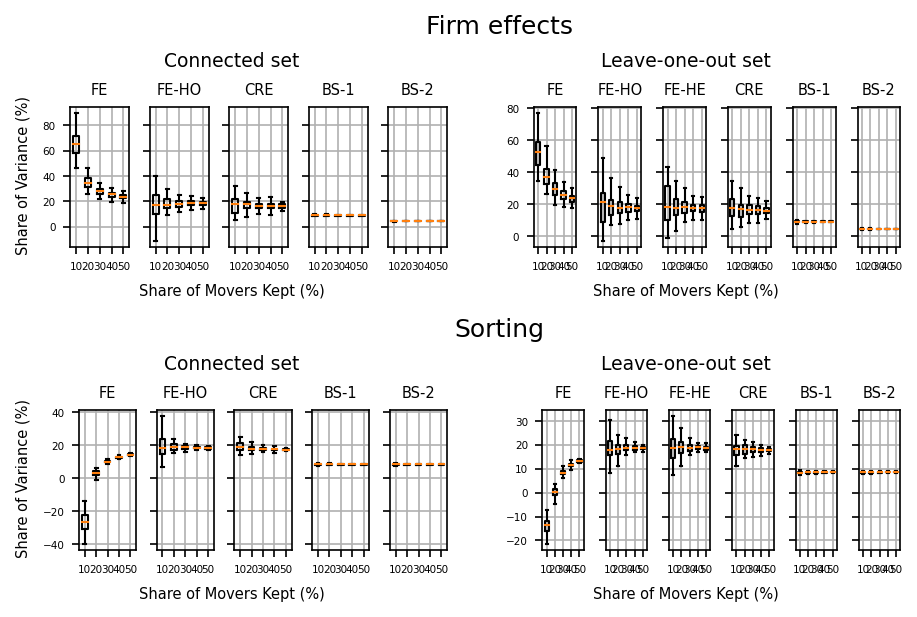

In [8]:
# Boxplots
tw_attrition.boxplots()

That's a bit crowded, let's zoom in on the bias-corrected results:

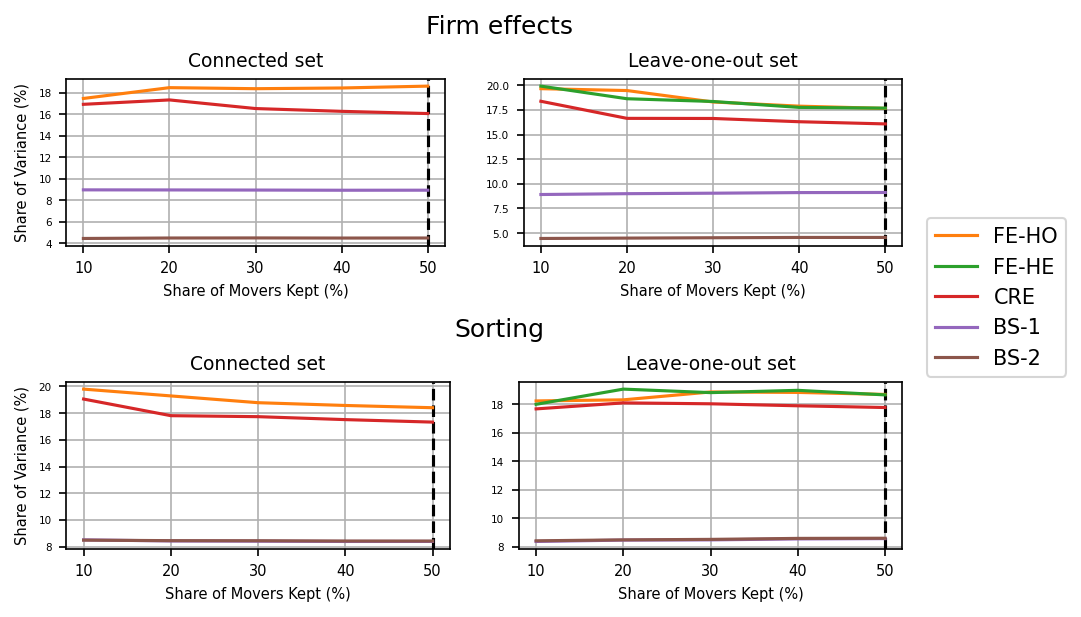

In [9]:
# Plots
tw_attrition.plots(fe=False)

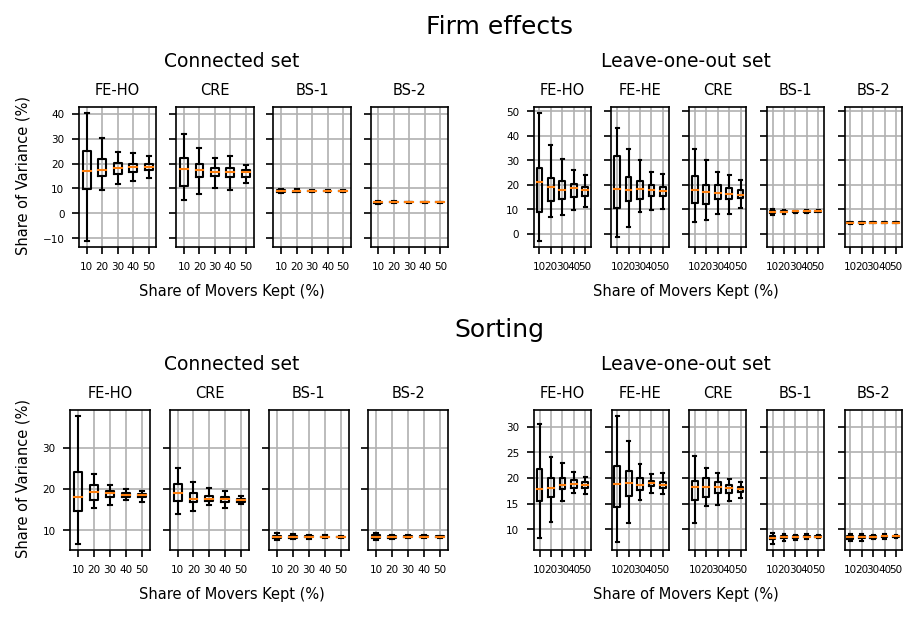

In [10]:
# Boxplots
tw_attrition.boxplots(fe=False)